In [134]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


#### Criação das colunas com a codificação das não numéricas (Time 1/2 e Position 1/2)

Gera-se um novo dataframe a partir do original (df) que conterá as novas colunas com as codificações


In [135]:
# Colunas não numéricas: Time e Position

times = np.union1d(df['Time 1'].dropna().unique(), df['Time 2'].dropna().unique())
times_codigo = {times[i]: (i+1) for i in range(len(times))}
print("Total de Times = {}".format(len(times)))

posicoes = np.union1d(df['Position 1'].dropna().unique(), df['Position 2'].dropna().unique())
posicoes_codigo = {posicoes[i]: (i+1) for i in range(len(posicoes))}
print("Total de Formações = {}".format(len(posicoes)))

def insere_coluna_codificada(df, coluna, nome_coluna_codigo, dicionario_codificacao):
    if(nome_coluna_codigo not in df.columns):
        df.insert(df.columns.get_loc( coluna )+1, nome_coluna_codigo, df[ coluna ].map( dicionario_codificacao ))

# Cria o dataframe com as colunas não numéricas codificadas em novas
df_codificado = df.copy()

insere_coluna_codificada(df_codificado, 'Position 1', 'Pos1_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Position 2', 'Pos2_codigo', posicoes_codigo)
insere_coluna_codificada(df_codificado, 'Time 1', 'Time1_codigo', times_codigo)
insere_coluna_codificada(df_codificado, 'Time 2', 'Time2_codigo', times_codigo)

df_codificado.head()


Total de Times = 310
Total de Formações = 30


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,77.0,23.0,Glasgow Rangers,119,Livingston,171,4-3-3,23.0,4-3-3,23.0
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,44.0,56.0,Ross County,236,St.Johnstone,260,3-5-2,12.0,3-5-2,12.0
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,47.0,53.0,Dundee FC,86,St. Mirren,259,4-3-3,23.0,3-4-1-2,8.0
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,27.0,73.0,Hearts,129,Celtic,69,3-4-3,10.0,4-2-3-1,20.0
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,58.0,42.0,Aberdeen,4,Dundee U.,87,4-4-2,25.0,3-5-1-1,11.0


#### Criação de heatmap com as correlações das colunas com Gol 1 e Gol 2

                       Gols 1    Gols 2
Chutes a gol 1       0.479780 -0.073841
Chutes a gol 2      -0.087561  0.485035
Impedimentos 1       0.042537 -0.042718
Impedimentos 2      -0.034537  0.028927
Escanteios 1         0.011726 -0.029138
Escanteios 2        -0.038578  0.026935
Chutes fora 1        0.001477 -0.049766
Chutes fora 2       -0.028409  0.000911
Faltas 1            -0.075141 -0.027099
Faltas 2            -0.062748 -0.046594
Cartões amarelos 1  -0.100813  0.083969
Cartões amarelos 2   0.010758 -0.035967
Cartões vermelhos 1 -0.066324  0.097772
Cartões vermelhos 2  0.091395 -0.056311
Cruzamentos 1       -0.095993  0.038224
Cruzamentos 2       -0.038870 -0.050135
Laterais 1          -0.122372 -0.019129
Laterais 2          -0.072432 -0.063851
Chutes bloqueados 1 -0.007881 -0.017845
Chutes bloqueados 2 -0.070105  0.056798
Contra-ataques 1     0.150537 -0.131422
Contra-ataques 2    -0.171393  0.207576
Gols 1               1.000000 -0.063875
Gols 2              -0.063875  1.000000


<Axes: >

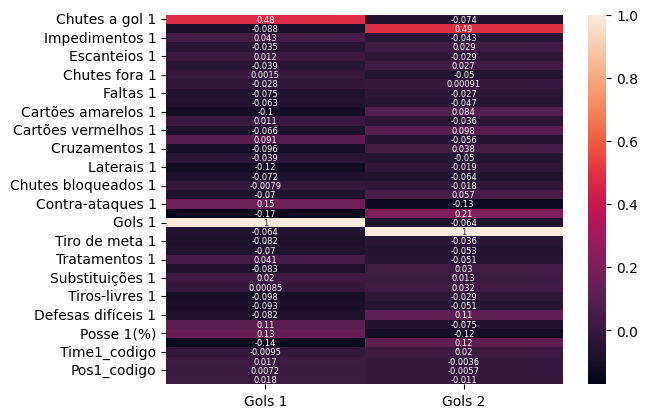

In [153]:
correlacoes = df_codificado.drop(['Time 1', 'Time 2', 'Position 1', 'Position 2'], axis=1).corr()
#sns.heatmap(correlacoes)

correlacoes_com_Gols = pd.DataFrame({
    "Gols 1": correlacoes['Gols 1'], 
    "Gols 2": correlacoes['Gols 2'], 
})

print(correlacoes_com_Gols)

sns.heatmap(correlacoes_com_Gols, annot=True, annot_kws={"size":6})

Porcentagem de NaN por colunas:

Esse código nos possibilita visualizar as porcentagens de valores nulos de cada coluna. 

Além disso, também, são printados na tela os tipos dos dados correspondentes de cada coluna. Essa informação é essencial para entendermos a tipagem dos dados com os quais estamos lidando.


In [137]:
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df)

print(tabelaPorcentagem)

print(df.dtypes)

Tratamentos 2          81.891326
Tratamentos 1          81.891326
Defesas difíceis 2     77.644682
Defesas difíceis 1     77.644682
Tiros-livres 1         77.464281
Tiros-livres 2         77.464281
Contra-ataques 2       77.402944
Contra-ataques 1       77.402944
Chutes bloqueados 1    68.094242
Chutes bloqueados 2    68.094242
Cruzamentos 1          67.473661
Cruzamentos 2          67.473661
Substituições 1        66.012412
Substituições 2        66.012412
Tiro de meta 1         56.649589
Tiro de meta 2         56.649589
Laterais 1             45.277096
Laterais 2             45.277096
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Posse 1(%)              8.478857
Posse 2(%)              8.478857
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 2           8.385048
Chutes fora 1           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Position 2              5.881080
Position 1              5.780055
Chutes a g

Considerando que as variáveis Gols 1 e 2 são as mais importantes para definir o resultado de um jogo, vamos estudar a correlação entre Gols 1 e 2 e as variáveis com mais de 10% de NaN para a partir disso quais iremos excluir. A coorelação pode ser vista tanto na atbela quanto no gráfico abaixo.

Correlação com Gols 1:


Contra-ataques 1       0.150537
Defesas difíceis 2     0.106227
Impedimentos 1         0.042537
Tratamentos 1          0.040736
Substituições 1        0.019577
Substituições 2        0.000853
Chutes bloqueados 1   -0.007881
Impedimentos 2        -0.034537
Cruzamentos 2         -0.038870
Tiro de meta 2        -0.070033
Chutes bloqueados 2   -0.070105
Laterais 2            -0.072432
Defesas difíceis 1    -0.081555
Tiro de meta 1        -0.081977
Tratamentos 2         -0.083453
Tiros-livres 2        -0.093325
Cruzamentos 1         -0.095993
Tiros-livres 1        -0.097648
Laterais 1            -0.122372
Contra-ataques 2      -0.171393
Name: Gols 1, dtype: float64


Correlação com Gols 2:


Contra-ataques 2       0.207576
Defesas difíceis 1     0.113768
Chutes bloqueados 2    0.056798
Cruzamentos 1          0.038224
Substituições 2        0.031954
Tratamentos 2          0.029815
Impedimentos 2         0.028927
Substituições 1        0.012750
Chutes bloqueados 1   -0.017845
Laterais 1            -0.019129
Tiros-livres 1        -0.028567
Tiro de meta 1        -0.035969
Impedimentos 1        -0.042718
Cruzamentos 2         -0.050135
Tiros-livres 2        -0.050869
Tratamentos 1         -0.051356
Tiro de meta 2        -0.053281
Laterais 2            -0.063851
Defesas difíceis 2    -0.075329
Contra-ataques 1      -0.131422
Name: Gols 2, dtype: float64

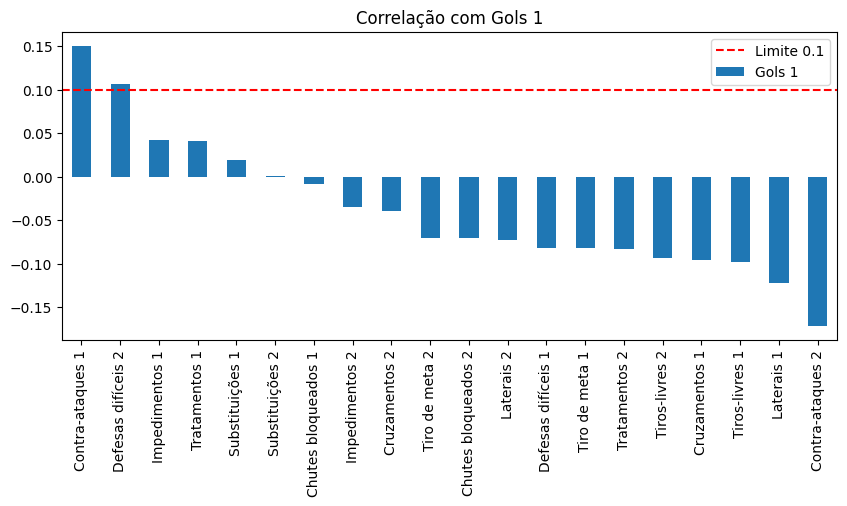

In [138]:
# Selecionar só as colunas com muitos NaNs
na_maiores_10 = df.columns[df.isnull().mean() > 0.1]

# Juntar com Gols 1 e Gols 2 para estudar correlação
colunas_para_estudo = list(na_maiores_10) + ['Gols 1', 'Gols 2']

# Criar uma cópia só com essas
estudo = df[colunas_para_estudo]

# Calcular correlação entre essas variáveis
correlacoes = estudo.corr(numeric_only=True)

# Visualizar a correlação com Gols 1 e Gols 2
cor_gols1 = correlacoes['Gols 1'].drop(['Gols 1', 'Gols 2'])
cor_gols2 = correlacoes['Gols 2'].drop(['Gols 1', 'Gols 2'])

# Mostrar ordenado
print("Correlação com Gols 1:")
display(cor_gols1.sort_values(ascending=False))

print("\nCorrelação com Gols 2:")
display(cor_gols2.sort_values(ascending=False))

cor_gols1.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 1', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()


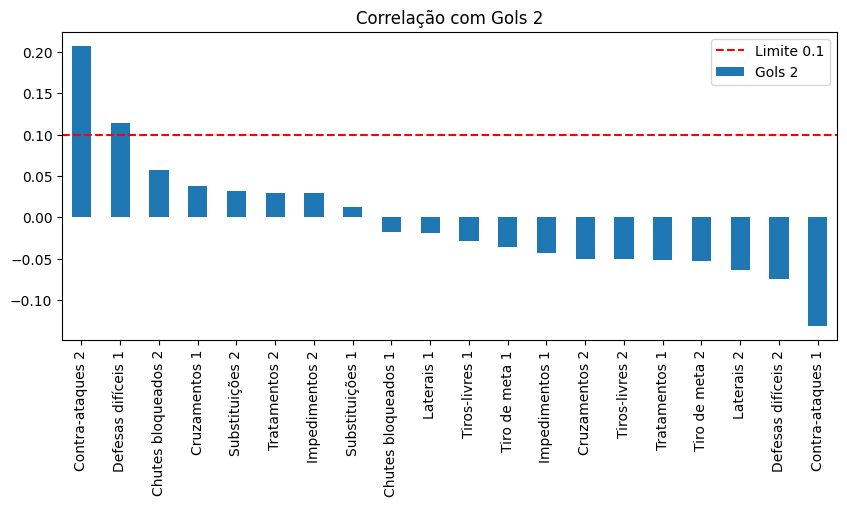

In [139]:
cor_gols2.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 2', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()

Baseado nas correlações apresentadas, algumas variáveis demonstram baixa relação com os gols marcados por cada time (Gols 1 e Gols 2), o que indica que elas podem ter pouca relevância na previsão de resultados. 

**O que os números significam?**  
Correlação próxima de 1 indica uma forte relação positiva (ex: quanto mais daquela variável, mais gols são marcados). Correlação próxima de -1 indica uma forte relação negativa (ex: quanto mais daquela variável, menos gols). Já valores próximos de 0 sugerem que não há relação clara.  
Na prática, em bases de dados reais (ou seja, com variações naturais, erros de entrada, valores ausentes — o chamado *ruído*), correlações acima de ±0.1 já podem indicar alguma influência, sendo este um valor de corte comumente utilizado em análises exploratórias para triagem de variáveis.

Com base nesse critério, e levando em conta que muitas dessas variáveis também possuem mais de 10% de valores ausentes (o que agrava a irrelevância), as seguintes variáveis foram selecionadas para descarte:

Laterais 1
Laterais 2
Tiros-livres 1
Tiros-livres 2
Tiro de meta 1
Tiro de meta 2
Substituições 1
Substituições 2
Cruzamentos 1
Cruzamentos 2
Tratamentos 1
Tratamentos 2
Chutes bloqueados 1
Chutes bloqueados 2
Impedimentos 1
Impedimentos 2

Essas variáveis possuem correlação inferior a ±0.1 com os gols dos respectivos times e podem ser eliminadas para reduzir a dimensionalidade do modelo. No entanto, vale destacar que uma variável pode ser mantida caso tenha justificativa contextual, por exemplo, se o conhecimento do domínio esportivo indicar uma possível influência indireta nos resultados.


In [140]:
colunas_para_dropar = [
    'Laterais 1', 'Laterais 2',
    'Tiros-livres 1', 'Tiros-livres 2',
    'Tiro de meta 1', 'Tiro de meta 2',
    'Substituições 1', 'Substituições 2',
    'Cruzamentos 1', 'Cruzamentos 2',
    'Tratamentos 1', 'Tratamentos 2',
    'Chutes bloqueados 1', 'Chutes bloqueados 2',
    'Impedimentos 1', 'Impedimentos 2'
]

# Confirma quais colunas realmente existem no DataFrame
colunas_existentes = [col for col in colunas_para_dropar if col in df.columns]

# Agora sim remove só as que existem
df = df.drop(columns=colunas_existentes)

df.head()


,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,...,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,...,3.0,0.0,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,...,0.0,0.0,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,...,2.0,2.0,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,...,2.0,1.0,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,...,2.0,0.0,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [141]:
df.shape

(27716, 24)

Na etapa de tratamento de dados faltantes, optamos pela imputação utilizando a mediana como estratégia principal. Embora existam diferentes métodos, como a substituição pela média, a mediana se destaca por sua robustez. Independentemente de a distribuição dos dados em uma variável ser simétrica ou assimétrica, a mediana tende a ser menos influenciada por valores extremos (outliers) e por possíveis desvios na distribuição. 

A imputação pela moda (categoria mais frequente) foi escolhida para substituir os valores faltantes nas colunas categóricas, como Time 1, Time 2, Position 1 e Position 2, pois assume que a categoria mais recorrente tem uma maior probabilidade de representar os dados ausentes e é onde a imputação de valores numéricos não seria adequada.

In [142]:
# Lista de colunas que não devem ser alteradas
colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']

# Cria uma nova lista com todas as colunas numéricas do df
# Verifica se as colunas em col são numéricas com pd.api.types.is_numeric_dtypes(df[col])
# Retorna True se a coluna col for numérica e False se não for numérica
colunas_para_imputar = [col for col in df.columns if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df[col])]

# Imputa os NaNs pela mediana de cada coluna

def preecheTabelaComMediana():
    for col in colunas_para_imputar:
        mediana = df[col].median()           # Calcula a mediana da coluna 
        df[col] = df[col].fillna(mediana)    # Susbtitui os valores NaN pela mediana 


def preecheTabelaComMedianaPorcentagem(porcentagem):

  for coluna in df:
    if(tabelaPorcentagem[coluna] < porcentagem and df.dtypes[coluna] == 'float64'):

      col_median=df[coluna].median()

      df[coluna]=df[coluna].fillna(col_median)

  return df 

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df['Position 1'].mode()[0],df['Position 2'].mode()[0]
    df['Position 1']=df['Position 1'].fillna(modaP1)
    df['Position 2']=df['Position 2'].fillna(modaP2)
    return df

preecheTabelaComMediana()
preencheTabelaComModa()

# Verifica se ainda existem NaNs

print(df.isnull().sum())


Chutes a gol 1         0
Chutes a gol 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Contra-ataques 1       0
Contra-ataques 2       0
Gols 1                 0
Gols 2                 0
Defesas difíceis 1     0
Defesas difíceis 2     0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
dtype: int64
